# Name : Jung-Hyun Lee
# Student ID : 2018120206
# link : https://github.com/JungHyun-L/DataMining

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

# computeDistance function

In [2]:
def computeDistance(vecOne,vecTwo) : # 두 벡터간의 거리를 계산한다
    return np.sqrt(np.sum((vecOne-vecTwo)**2))

# initialiseLabel function

In [3]:
def initialiseLabel(clusterCount,pointCount,dataFrame) : # random하게 labeling을 한다
    np.random.choice(clusterCount,pointCount)
    label = np.random.choice(clusterCount,pointCount)
    df=np.column_stack((dataFrame,label))
    return (df)

# computeCentroid function

In [4]:
def computeCentroid(dataFrame,clusterCount) : # 중심값을 계산하여 데이터 프레임으로 반환한다
    totalCentroid = np.zeros((1,785))
    for i in range(clusterCount):
        centroid=np.mean(dataFrame[dataFrame[:,784]==i],axis=0)
        recentroid = centroid.reshape(1,785)
        totalCentroid = np.vstack([totalCentroid,recentroid])
    totalCentroid = np.delete(totalCentroid,0,0)
    return (totalCentroid)

# assignLabel function

In [5]:
def assignLabel(dataFrame,centroid,clusterCount,pointCount) : # 각 클러스터의 중심값과의 거리를 계산하여 labeling을 한다
    for i in range(pointCount):
        minDist=999999999999999999999; minIndex=-1;distance=0;
        for k in range(clusterCount):
            distance=computeDistance(dataFrame[i:i+1,:784],centroid[k:k+1,:784])
            if distance<minDist:
                minDist=distance;minIndex=k
            dataFrame[i:i+1,784:785]=minIndex
    return (dataFrame)
        

# computeEnergy function

In [6]:
def computeEnergy(dataFrame,centroid,clusterCount) : # 각 중심값과의 거리 제곱 합으로 energy를 구한다
    energy=0;distance=0;
    for i in range(clusterCount):
        idxData=dataFrame[dataFrame[:,784]==i]
        rowCount=np.size(idxData,0)
        for k in range(rowCount):
            distance=computeDistance(idxData[k:k+1,:784],centroid[i:i+1,:784])
            energy+=np.square(distance) 
    return (energy)

# computeAccuracy function

In [7]:
def computeAccuracy(dataFrame,trueLabels,clusterCount) : # 정확도를 구한다 
    trueCounts=0
    for i in range(clusterCount):
        cluster=trueLabels[dataFrame[:,784]==i]
        cluster=cluster.astype(int)
        label=np.bincount(cluster).argmax()
        
        middleResult=sum(cluster[:]==label)/np.size(cluster,0)
        trueCounts+=sum(cluster[:]==label)
        
    accuracy=trueCounts/np.size(dataFrame,0) # 맞은 갯수/전체 데이터
    return (accuracy)

# kmenasClustering function

In [8]:
def kmenasClustering(dataFrame,trueLabels,centroid,clusterCount,pointCount) : # 앞서 만든 함수들을 토대로 k-means clustering을 수행한다 
    i=1;finalEnergy=0;
    energyArray=np.array([]);accuracyArray=np.array([])
    while True:
        print("%d 번째 에너지,정확도 출력: "%i)
        energy=computeEnergy(dataFrame,centroid,clusterCount)
        accuracy=computeAccuracy(dataFrame,trueLabels,clusterCount)
        accuracyArray=np.append(accuracyArray,accuracy)
        energyArray=np.append(energyArray,energy)
        print(energy)
        print(accuracy)
        if(energy==finalEnergy): # 이전에 계산한 energy와 같을 때까지 반복 수행
            break
        finalEnergy=energy
        dataFrame=assignLabel(dataFrame,centroid,clusterCount,pointCount)
        centroid=computeCentroid(dataFrame,clusterCount)
        i+=1
    return (dataFrame,accuracyArray,energyArray)

# Reading mnist data set

In [9]:
data = genfromtxt('mnist_test.csv', delimiter=',') # 'minist_test' csv파일을 불러온다

In [10]:
trueLabels=data[:,0] # 진짜 label을 저장해 놓는다
df=data[:,1:]

df=initialiseLabel(10,10000,df)
centroid = computeCentroid(df,10)

numRows=np.size(df,0)

# Energy, Accuracy per each iteration

In [11]:
finalDf,accuracy,energy=  kmenasClustering(df,trueLabels,centroid,10,numRows) # 정의한 함수를 통해 k-means clustering을 수행

1 번째 에너지,정확도 출력: 
34333930943.510155
0.1198
2 번째 에너지,정확도 출력: 
29130527792.413292
0.3783
3 번째 에너지,정확도 출력: 
26629894393.990734
0.5315
4 번째 에너지,정확도 출력: 
26069956534.25695
0.5773
5 번째 에너지,정확도 출력: 
25906931964.992706
0.5885
6 번째 에너지,정확도 출력: 
25816390833.62097
0.5955
7 번째 에너지,정확도 출력: 
25758857890.277897
0.5994
8 번째 에너지,정확도 출력: 
25719909503.579777
0.6019
9 번째 에너지,정확도 출력: 
25686072865.53102
0.6029
10 번째 에너지,정확도 출력: 
25653524772.787647
0.6038
11 번째 에너지,정확도 출력: 
25625249144.62882
0.609
12 번째 에너지,정확도 출력: 
25597119616.22946
0.6119
13 번째 에너지,정확도 출력: 
25574142154.718204
0.6135
14 번째 에너지,정확도 출력: 
25558997544.683983
0.6129
15 번째 에너지,정확도 출력: 
25550323347.601048
0.6123
16 번째 에너지,정확도 출력: 
25544673067.87094
0.614
17 번째 에너지,정확도 출력: 
25540688421.91841
0.6145
18 번째 에너지,정확도 출력: 
25538247708.153534
0.615
19 번째 에너지,정확도 출력: 
25536773977.50287
0.6149
20 번째 에너지,정확도 출력: 
25535459972.111088
0.6152
21 번째 에너지,정확도 출력: 
25533914828.120785
0.6152
22 번째 에너지,정확도 출력: 
25532551148.347546
0.6149
23 번째 에너지,정확도 출력: 
25531104674

# graph of accuracy

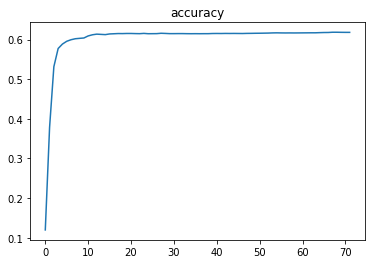

In [12]:
plt.title('accuracy') # 정확도에 대한 그래프를 구한다 
plt.plot(accuracy)

# graph of energy

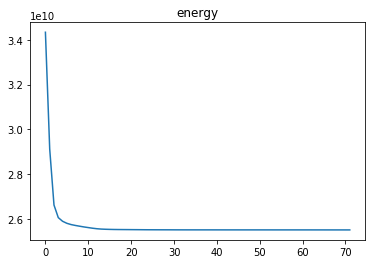

In [13]:
plt.title('energy') # 에너지에 대한 그래프를 구한다
plt.plot(energy)

# Initial ,Final Centroid images

In [14]:
size_row    = 28    # height of the image
size_col    = 28    # width of the image


# initial centroid image 

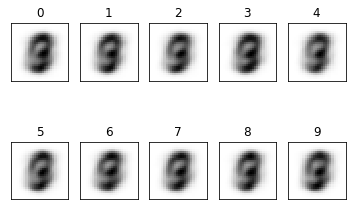

In [15]:
centroidImg=centroid[:,:784] 
centroidImgT=centroidImg.transpose()

for i in range(10): # 맨처음 centroid의 이미지를 나타낸다
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(centroidImgT[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

# final centroid image

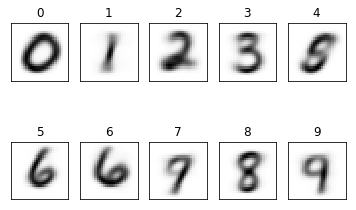

In [16]:
finalCentroid=computeCentroid(finalDf,10)
finalCentroid

for i in range(10):
    cluster=trueLabels[finalDf[:,784]==i]
    cluster=cluster.astype(int)
    label=np.bincount(cluster).argmax()
    finalCentroid[i,784]=label

finalCentroid=finalCentroid[finalCentroid[:,784].argsort()]    

finalCentroidImg=finalCentroid[:,:784]
finalCentroidImgT=finalCentroidImg.transpose()

# 몇 개의 숫자는 훈련이 제대로 되지 않아 이미지가 명확하지 않음
for i in range(10): # k-means clustering을 수행한 후의 최종 centorid의 이미지를 출력한다
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(finalCentroidImgT[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)